# Join Sharpes

This file joins together the various csv files generated using 'assign-sharpe.ipynb' into a single file to be used by the RealAllocator app. 

File paths will need to be changed and after the main file is written there is some random exploratory work to look at the distribution of Sharpe ratios. This was the start of looking into dimishing returns type bounds on the Sharpe ratio improvement to stop simply grabbing as much real estate as possible.

## Basic Flow

The first few cells read in the 'assign-sharpe' output files and display header info. Several pd.merge commands are done to combine the files read in. Depending on changes to the output of assign-sharpe, these merges may need adjustment - for example I assume each file has a distinct name for it's Sharpe ratio column which may not be the case depending on how assign-sharpe is being used.

The result of the merges are then saved to a file. Followed by some random exploration which isn't very meaningful at this point.

In [9]:
import numpy as np
import pandas as pd

vpGen = pd.read_csv('/home/jpreszler/github/insight-project/data/vp-sharpe-gen.csv')
vpGen.head()

,stock weight,bond weight,real estate weight,Sharpe All
0,0.0,0.00,1.00,1.911
1,0.0,0.01,0.99,1.892
2,0.0,0.02,0.98,1.865
3,0.0,0.03,0.97,1.831
4,0.0,0.04,0.96,1.793


In [10]:
vp0 = pd.read_csv('/home/jpreszler/github/insight-project/data/vp-sharpe-0.csv')
vp0.head()

,stock weight,bond weight,real estate weight,Sharpe 0
0,0.0,0.00,1.00,1.478
1,0.0,0.01,0.99,1.473
2,0.0,0.02,0.98,1.467
3,0.0,0.03,0.97,1.459
4,0.0,0.04,0.96,1.449


In [11]:
vp1 = pd.read_csv('/home/jpreszler/github/insight-project/data/vp-sharpe-1.csv')
vp1.head()

,stock weight,bond weight,real estate weight,Sharpe 1
0,0.0,0.00,1.00,0.903
1,0.0,0.01,0.99,0.909
2,0.0,0.02,0.98,0.907
3,0.0,0.03,0.97,0.901
4,0.0,0.04,0.96,0.895


In [12]:
vp2 = pd.read_csv('/home/jpreszler/github/insight-project/data/vp-sharpe-2.csv')
vp2.head()

,stock weight,bond weight,real estate weight,Sharpe 2
0,0.0,0.00,1.00,1.874
1,0.0,0.01,0.99,1.880
2,0.0,0.02,0.98,1.881
3,0.0,0.03,0.97,1.877
4,0.0,0.04,0.96,1.869


## The Merge

In [13]:
vp = pd.merge(vpGen, vp0, on=['stock weight', 'bond weight', 'real estate weight'])
vp = pd.merge(vp, vp1, on=['stock weight', 'bond weight', 'real estate weight'])
vp = pd.merge(vp, vp2, on=['stock weight', 'bond weight', 'real estate weight'])
vp.head()

,stock weight,bond weight,real estate weight,Sharpe All,Sharpe 0,Sharpe 1,Sharpe 2
0,0.0,0.00,1.00,1.911,1.478,0.903,1.874
1,0.0,0.01,0.99,1.892,1.473,0.909,1.880
2,0.0,0.02,0.98,1.865,1.467,0.907,1.881
3,0.0,0.03,0.97,1.831,1.459,0.901,1.877
4,0.0,0.04,0.96,1.793,1.449,0.895,1.869


In [14]:
vp['Sharpe'] = vp[['Sharpe 0', 'Sharpe 1', 'Sharpe 2']].mean(axis=1).round(decimals=2)
vp['std Sharpe'] = vp[['Sharpe', 'Sharpe 0', 'Sharpe 1', 'Sharpe 2']].std(axis=1).round(decimals=2)
vp.head()


,stock weight,bond weight,real estate weight,Sharpe All,Sharpe 0,Sharpe 1,Sharpe 2,Sharpe,std Sharpe
0,0.0,0.00,1.00,1.911,1.478,0.903,1.874,1.42,0.4
1,0.0,0.01,0.99,1.892,1.473,0.909,1.880,1.42,0.4
2,0.0,0.02,0.98,1.865,1.467,0.907,1.881,1.42,0.4
3,0.0,0.03,0.97,1.831,1.459,0.901,1.877,1.41,0.4
4,0.0,0.04,0.96,1.793,1.449,0.895,1.869,1.40,0.4


## Write Merged File

In [15]:
vp.to_csv('/home/jpreszler/github/insight-project/data/vp-sharpe-all.csv', index=False)

## Misc. Exploratoy work

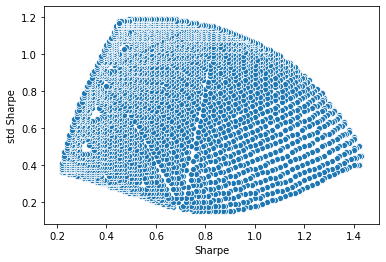

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.scatterplot(x='Sharpe', y='std Sharpe', data=vp)

In [15]:
lowest_risk = vp[(vp['bond weight']>.45) & (vp['bond weight']<.70)]

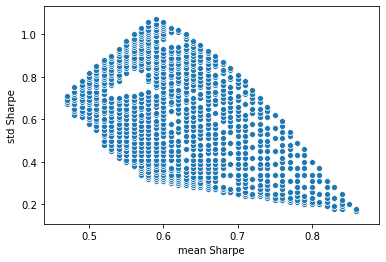

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='mean Sharpe', y='std Sharpe', data=lowest_risk)

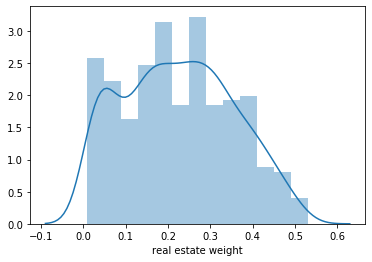

In [18]:
sns.distplot(lowest_risk['real estate weight'])

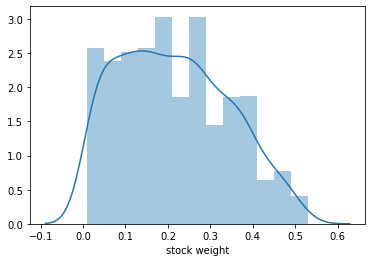

In [19]:
sns.distplot(lowest_risk['stock weight'])

In [20]:
lowest_risk[lowest_risk['mean Sharpe']>.8]

,stock weight,bond weight,real estate weight,Sharpe,Sharpe 0,Sharpe 1,Sharpe 2,mean Sharpe,std Sharpe
45,0.01,0.46,0.53,-0.752,-0.890,-1.085,-0.705,0.86,0.17
46,0.01,0.47,0.52,-0.736,-0.877,-1.079,-0.683,0.84,0.18
47,0.01,0.48,0.51,-0.720,-0.864,-1.074,-0.661,0.83,0.18
48,0.01,0.49,0.50,-0.704,-0.851,-1.068,-0.639,0.82,0.19
143,0.02,0.46,0.52,-0.729,-0.947,-1.057,-0.701,0.86,0.17
144,0.02,0.47,0.51,-0.713,-0.933,-1.052,-0.678,0.84,0.18
145,0.02,0.48,0.50,-0.697,-0.920,-1.047,-0.656,0.83,0.19
146,0.02,0.49,0.49,-0.682,-0.907,-1.042,-0.634,0.82,0.19
240,0.03,0.46,0.51,-0.701,-1.003,-1.022,-0.695,0.86,0.18
241,0.03,0.47,0.50,-0.685,-0.989,-1.017,-0.673,0.84,0.19


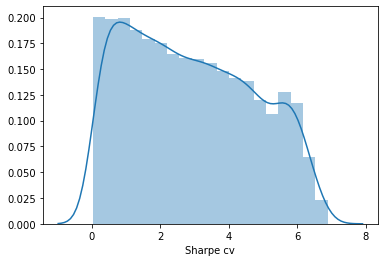

In [30]:
vp['Sharpe cv'] = vp['std Sharpe']/(-1*vp['Sharpe'])
sns.distplot(vp['Sharpe cv'])

In [34]:
low_risk = vp[(vp['bond weight']>.40)&(vp['bond weight']<.50)&(vp['stock weight']>.45)&(vp['stock weight']<.60)]
low_risk[low_risk['Sharpe']==low_risk['Sharpe'].min()]

,stock weight,bond weight,real estate weight,Sharpe,Sharpe 0,Sharpe 1,Sharpe 2,mean Sharpe,std Sharpe,Sharpe cv
3354,0.46,0.41,0.13,-0.223,-2.219,0.132,-0.355,0.81,1.06,4.753363


In [89]:
curr_sw = .65
curr_bw = .35
similar_port = vp[(np.abs(vp['stock weight']-curr_sw)<.02) & (np.abs(vp['bond weight']-curr_bw) < .02)]

similar_port['Sharpe'].mean()
#bigger_sharpe = vp[vp['Sharpe']<similar_port['Sharpe'].mean()]
#less_varied_sharpe = vp[vp['std Sharpe']<similar_port['std Sharpe'].mean()]
#print(bigger_sharpe.shape)
#less_varied_sharpe.shape

-0.20766666666666667

In [83]:
both = pd.merge(bigger_sharpe, less_varied_sharpe, how='inner')
print(both['bond weight'].mode())
print(both['real estate weight'].mode())
both[(both['bond weight']==.34)&(both['real estate weight']==.18)]

0    0.34
dtype: float64
0    0.18
dtype: float64


,stock weight,bond weight,real estate weight,Sharpe,Sharpe 0,Sharpe 1,Sharpe 2,mean Sharpe,std Sharpe,Sharpe cv,downside
2763,0.48,0.34,0.18,-0.26,-2.374,0.172,-0.449,0.88,1.13,4.346154,2.030259
